### Activate inline plotting

In [4]:
%pylab inline
import sys
sys.path.insert(0, '..')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Loading data

In [5]:
from data import Dataset

In [6]:
dataset = Dataset('../data/signal_TDR.root')

### Positions of wires

In [7]:
rhos, phis = dataset.get_wires_rhos_and_phis()

In [8]:
rhos

array([ 51.4,  51.4,  51.4, ...,  81.8,  81.8,  81.8])

### Energy deposits

In [9]:
dataset.get_energy_deposits(event_id=0)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

### Benchmarking the time needed to load all the events

In [10]:
dataset.n_events

3445

In [11]:
%%time
for i in range(dataset.n_events):
    z = dataset.get_energy_deposits(i)

CPU times: user 237 ms, sys: 911 µs, total: 238 ms
Wall time: 237 ms


### Drawing

In [12]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)    

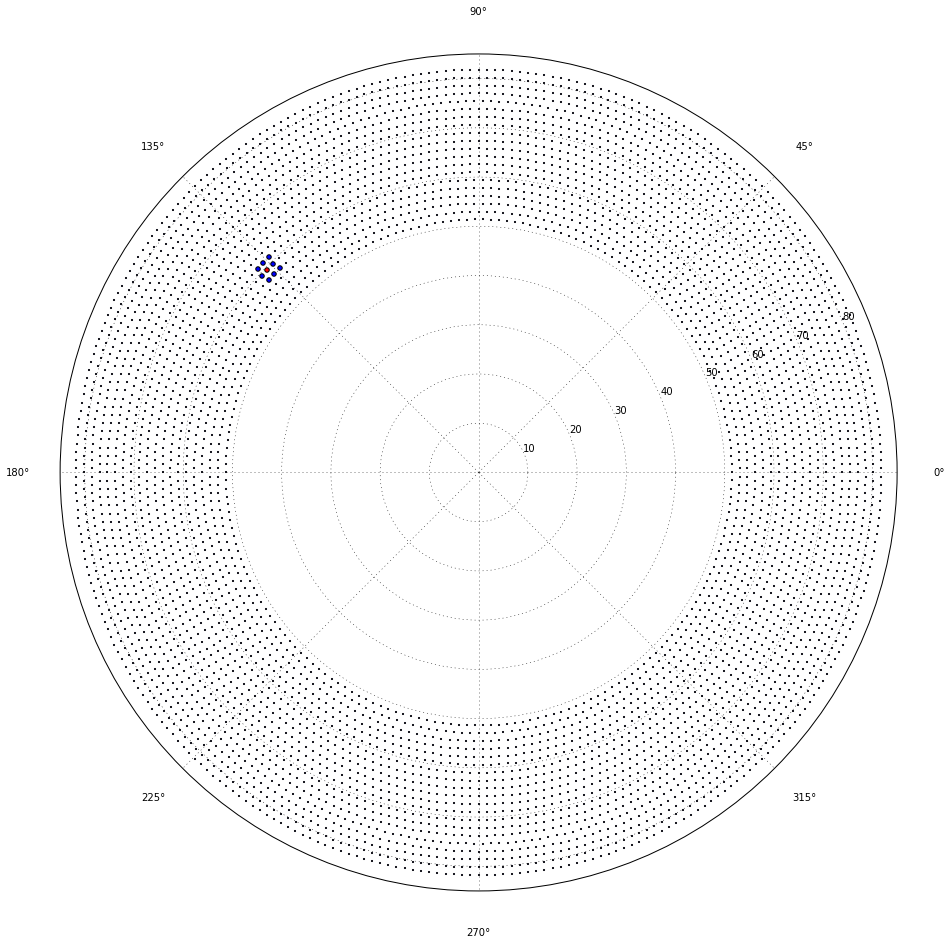

In [13]:
from scipy.sparse import *
setup_plot_for_detector()
scatter(phis, rhos, marker='.', s=5)

wire1 = 1110
neigh1 = find(dataset.neighbours_table[wire1,:])[1]
scatter(phis[neigh1],rhos[neigh1], marker='o', c='b')
scatter(phis[wire1],rhos[wire1], marker='o', c='r')

### Drawing deposited energies

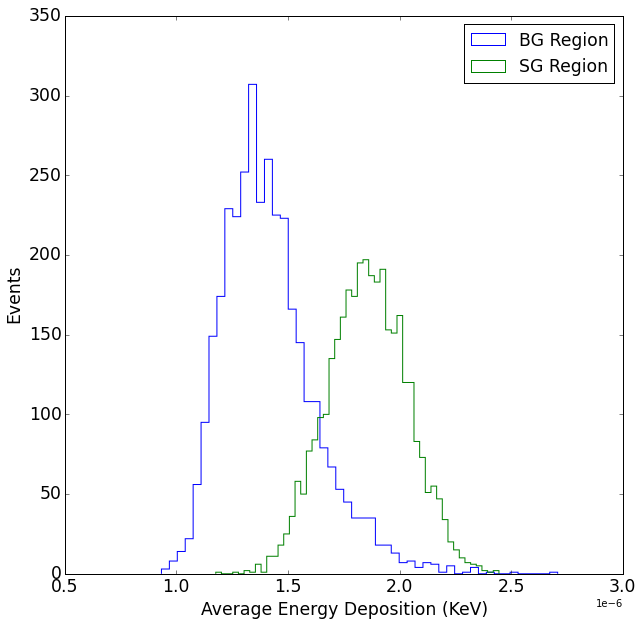

In [14]:
e_cut = 0.000005
phi_win = math.pi/2.

avg_e_sig_half = np.zeros(dataset.n_events)
avg_e_bg_half = np.zeros(dataset.n_events)

for event in range(dataset.n_events):
    pass_e_cut_sg = where( (dataset.get_hit_types(event) == 1) & 
                        (dataset.get_energy_deposits(event_id=event) < e_cut) )

    first_phi = min(phis[pass_e_cut_sg])

    sig_half   = where( (dataset.get_hit_types(event) != 0) & 
                        (dataset.get_energy_deposits(event_id=event) < e_cut) & 
                         ( (phis - first_phi)%(2*math.pi) < phi_win )          )

    bg_half   = where( (dataset.get_hit_types(event) != 0) & 
                        (dataset.get_energy_deposits(event_id=event) < e_cut) & 
                         ( (phis - first_phi)%(2*math.pi) > phi_win )          )

    e_dep_sig_half = dataset.get_energy_deposits(event)[sig_half]
    avg_e_sig_half[event] = sum(e_dep_sig_half)/len(e_dep_sig_half)
    

    e_dep_bg_half = dataset.get_energy_deposits(event)[bg_half]
    avg_e_bg_half[event] = sum(e_dep_bg_half)/len(e_dep_bg_half)

figsize(10,10)
plt.xticks(label='Average Energy Deposition', fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('Average Energy Deposition (KeV)', fontsize='xx-large')
plt.ylabel('Events', fontsize='xx-large')
plt.hist(avg_e_sig_half,bins=50,histtype='step',label="BG Region")
plt.hist(avg_e_bg_half,bins=50,histtype='step',label="SG Region")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize='xx-large')

## Drawing deposits and labels 

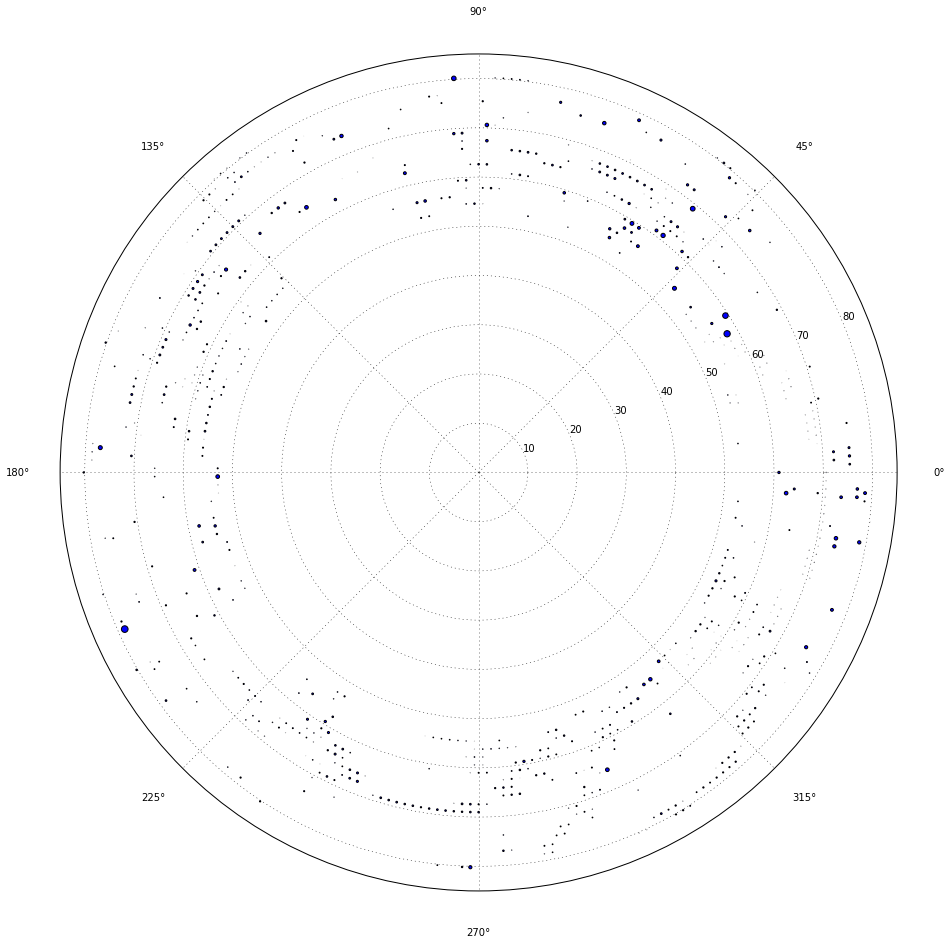

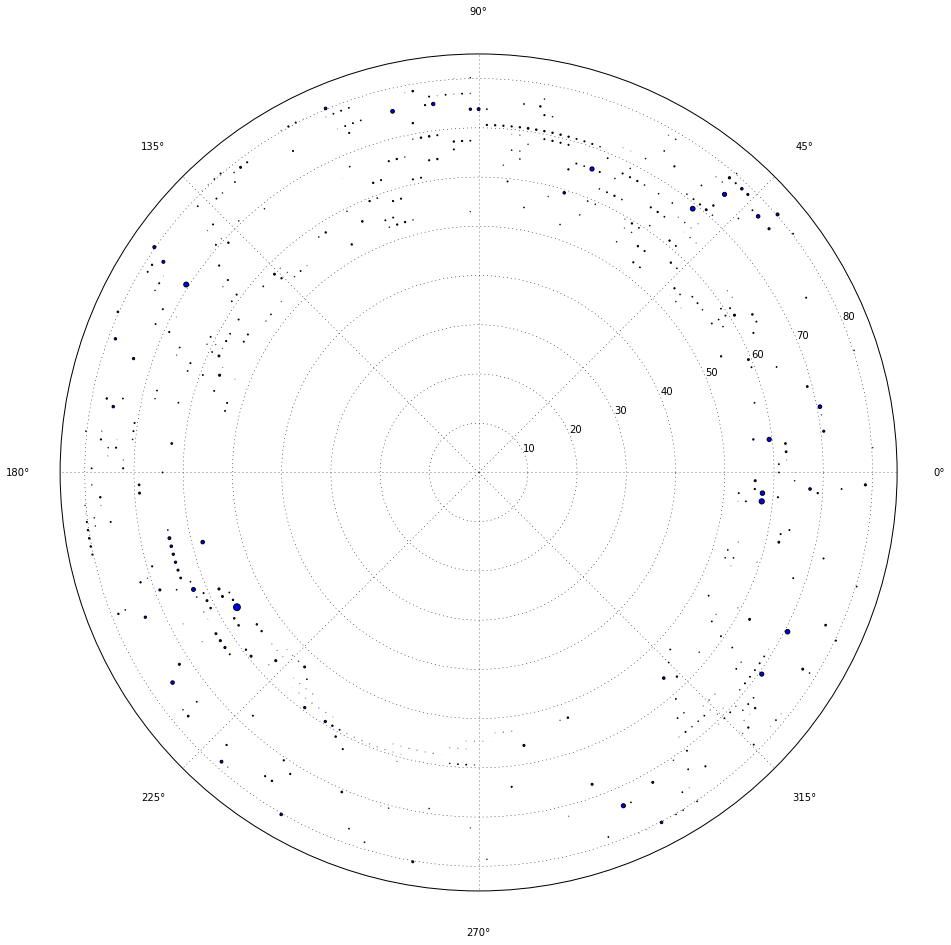

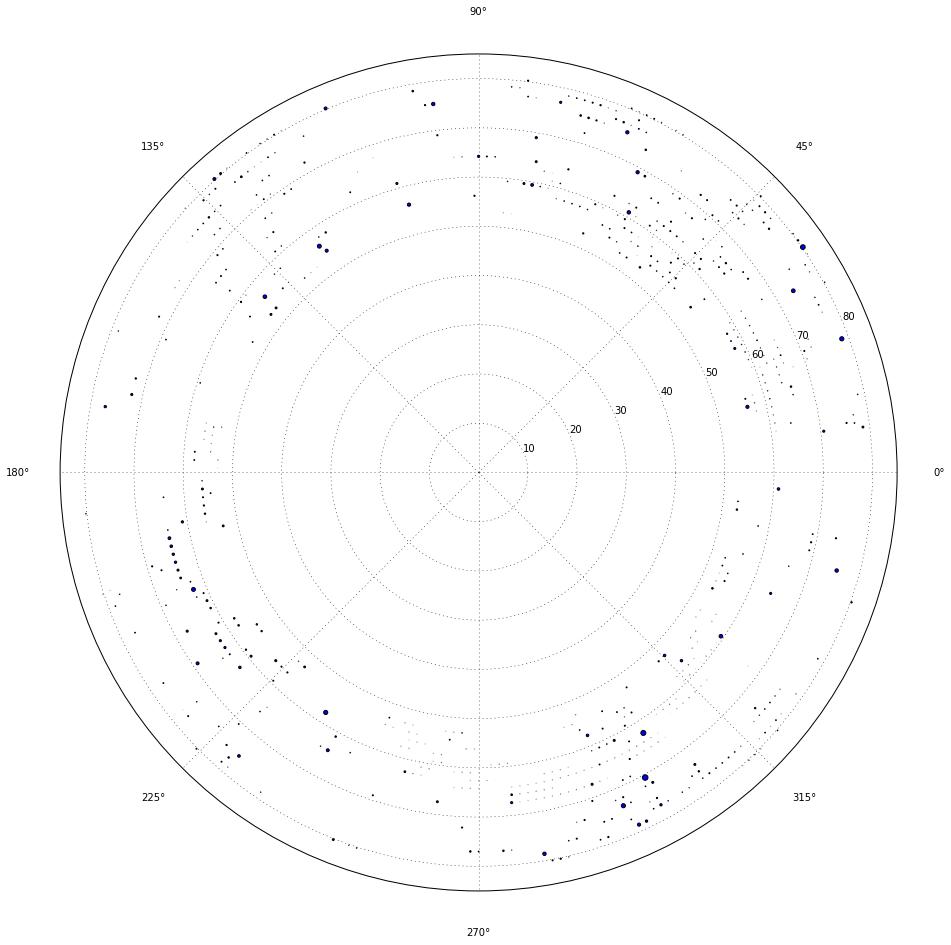

In [15]:
for event_id in [1, 4, 5]:
    setup_plot_for_detector()
    scatter(phis, rhos, dataset.get_energy_deposits(event_id=event_id) * 30000)
    show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


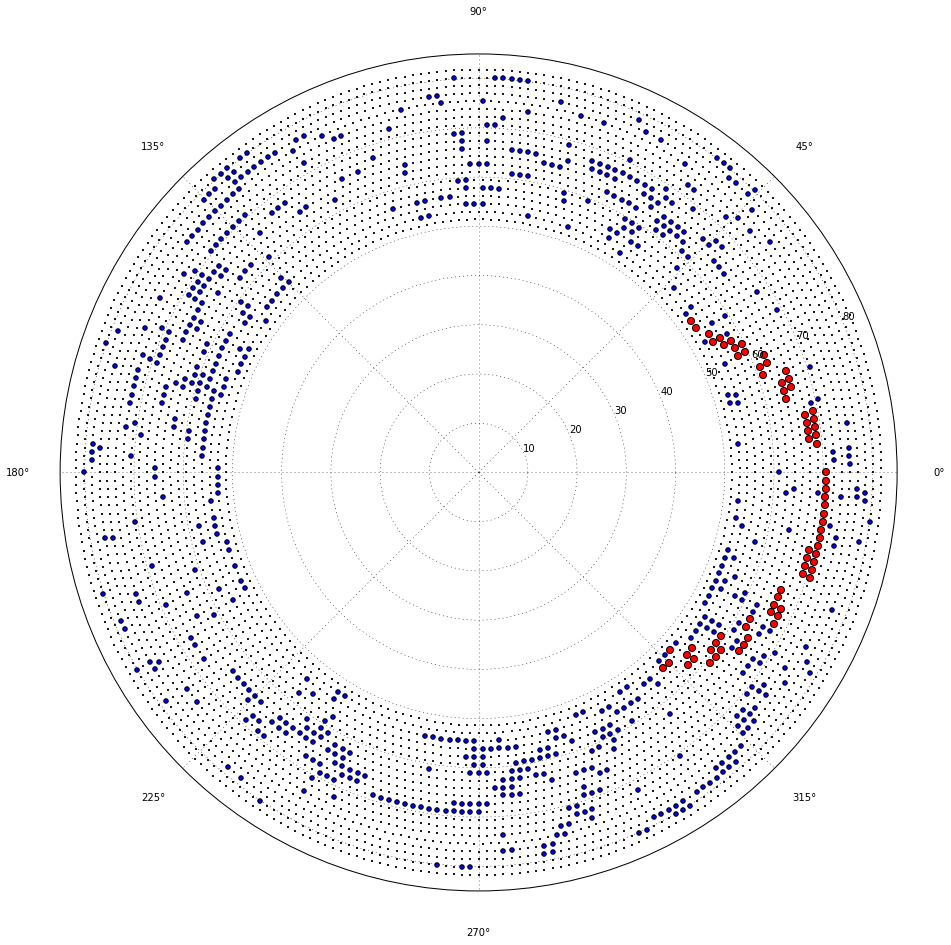

In [16]:
%pylab inline
import sys
sys.path.insert(0, '..')
from data import Dataset
dataset = Dataset('../data/signal_TDR.root')
rhos, phis = dataset.get_wires_rhos_and_phis()

evt = 1

def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)    
    
setup_plot_for_detector()
sg = where(dataset.get_hit_types(evt) == 1)[0]
bg = where(dataset.get_hit_types(evt) == 2)[0]
scatter(phis, rhos, marker='.', s=5)
scatter(phis[bg], rhos[bg], marker='o', c='b')
scatter(phis[sg], rhos[sg], marker='o', c='r',s=50)